# Project 7 - Wrangle and Analyze Data

### Overview
To do...

In [1]:
# Imports
import fractions
import io
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os
import pandas as pd
import pycountry
import re
import requests
import sys

# Jupyter setup - allow inline plotting
%matplotlib inline

# Gather

In [2]:
# Load base dataframes

# Load main Twitter Archive
dfta = pd.read_csv('twitter-archive-enhanced.csv')

# Retrieve tweeet image predictions
resp = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
# Text content, so prefer decoded version:
# wrap_resp = io.BytesIO(resp.content)
wrap_resp = io.StringIO(resp.text)
dfip = pd.read_csv(wrap_resp, sep='\t')

In [3]:
# Retrieve additional info via Twitter API
# Created stand alone module to handle this - not putting in the notebook as it's too long
# By default, the current working directory isn't in the module search path so have to add it:
cwd = %pwd
if cwd not in sys.path:
    sys.path.append(cwd)

# Now load module
import get_tweets
# Only fetch tweets from Twitter if haven't alrady done so:
if not get_tweets.main('check'):
    get_tweets.main('update')

# Save tweets to file using JSON-encoding
if 'tweet_json.txt' not in os.listdir(cwd):
    get_tweets.main('json-out')

# Load tweetdb
twdb = get_tweets.main('load')

Info:  Checking if number of tweet IDs matches number in local database...
Local database up to date.


In [4]:
twdb.keys()

dict_keys(['users', 'missing', 'retrieved', 'tweetdb', 'userdb'])

In [5]:
# Load tweets into dataframe
dftw = pd.DataFrame.from_dict(twdb['tweetdb'], orient='index')

# Assess

Also loaded twitter-archive-enhanced.csv and image-predictions.tsv into Excel spreadsheet for visual examination - see "twitter-archive-enhanced.xlsx".  In addition, created a 3rd tab in this spreadsheet showing twitter user and status fields (retrieved by tweepy library), their description, and links to Twitter docs.

In [6]:
print('Twitter Archive DataFrame:')
display(dfta.head())
display(dfta.info())
print('>' + '=' * 132 + '<')

print('Twitter Image Predictions DataFrame:')
display(dfip.head())
display(dfip.info())
print('>' + '=' * 132 + '<')
# Confirmed all tweet_ids in dfip are unique
# Confirmed there are two .png files in the "jpg_url" column by checking media info from twitter

print('Tweet data from Twitter (per dfta IDs) DataFrame:')
display(dftw.head())
display(dftw.info())

Twitter Archive DataFrame:


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

None

>====================================================================================================================================<
Twitter Image Predictions DataFrame:


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


None

>====================================================================================================================================<
Tweet data from Twitter (per dfta IDs) DataFrame:


,code,message,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,...,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
666020888022790149,NaN,NaN,Sun Nov 15 22:32:08 +0000 2015,6.660209e+17,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...",...,2557.0,False,False,False,en,NaN,NaN,NaN,NaN,NaN
666029285002620928,NaN,NaN,Sun Nov 15 23:05:30 +0000 2015,6.660293e+17,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...",...,130.0,False,False,False,en,NaN,NaN,NaN,NaN,NaN
666033412701032449,NaN,NaN,Sun Nov 15 23:21:54 +0000 2015,6.660334e+17,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...",...,125.0,False,False,False,en,NaN,NaN,NaN,NaN,NaN
666044226329800704,NaN,NaN,Mon Nov 16 00:04:52 +0000 2015,6.660442e+17,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...",...,298.0,False,False,False,en,NaN,NaN,NaN,NaN,NaN
666049248165822465,NaN,NaN,Mon Nov 16 00:24:50 +0000 2015,6.660492e+17,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...",...,109.0,False,False,False,en,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 666020888022790149 to 892420643555336193
Data columns (total 33 columns):
code                         14 non-null float64
message                      14 non-null object
created_at                   2342 non-null object
id                           2342 non-null float64
id_str                       2342 non-null object
full_text                    2342 non-null object
truncated                    2342 non-null object
display_text_range           2342 non-null object
entities                     2342 non-null object
extended_entities            2067 non-null object
source                       2342 non-null object
in_reply_to_status_id        78 non-null float64
in_reply_to_status_id_str    78 non-null object
in_reply_to_user_id          78 non-null float64
in_reply_to_user_id_str      78 non-null object
in_reply_to_screen_name      78 non-null object
user                         2342 non-null object
geo                   

None

# Clean

## Quality Issues (Define)
##### Twitter Archive Table
* Change tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_user_id columns from int to str
  * Note:  A Twitter "tweet" is referred to by Twitter as a status
  * Rename confusing tweet_id column to id_str - other columns refer to "status" not "tweet" so keep consistent
* Convert timestamp and retweeted_status_timestamp columns to datetime
* Some of the tweet IDs from this table came back as either invalid or unauthorized (see TWeets Table) - remove these
* Only keep original tweets - prune quoted tweets, retweets, reply tweets per project specifications
* Extracted data (dfta) - rating, dog name, dog "stage" may be incorrect
  * For rating and dog "stage" - re-extracted data as this seems easier than trying to figure out what's wrong
  * For dog name, couldn't find easy way to re-extract dog names - found that names starting with a lowercase letter are invalid, prune these

##### Image Prediction Table
* As per Twitter Archive Table above, change tweet_id column to str and rename to id_str

##### retrieved TWeets Table
* The following columns have no valid values and can be removed - geo, coordinates, contributors
* place column has only single valid entry, no perceived value - remove
* truncated column is always false because we used the extended tweet option to get full tweet text - remove
* possibly_sensitive column is either false or null, no perceived value - remove
* retweeted and favorited columns show if authenticating user retweeted or "liked" this tweet, but since the authenticating user was only used to retrieve the tweets and isn't involved with them these columns can be removed
* quoted_status column contains embedded tweet if tweet is a quote tweet, but only want tweet id as a string and already have this info (column=quoted_status_id_str) so remove
* Rename code and message to err_code and err_message to more accurately reflect their meaning (Error Code, Error Message), rename user to user_id_str to better represent its meaning
* \*id and \*id_str columns are same thing - one is int, other is str; since these are identifiers (more like categorical) just keep str version - remove id, in_reply_to_status_id, in_reply_to_user_id, quoted_status_id columns
* Rows with err_code don't have id_str, id is represented by index (row) label - fix
* created_at column - convert to datetime type
* source column - category, only care about text thus strip out HTML tags and convert to categorical type
* user_id_str column - dict of user id and user id as a string, extract just the string id
* is_quote_status - convert to boolean type
* code - integer status code, but ints in Series can't be null so use str instead
* retweet_count, favorite_count - convert to int, since ints can't store Nulls use -1 to represent Null/Invalid value
* quoted_status_permalink column consists of three values - a shortened URL, a full URL with the quoted users' screen name and quoted status id, and an abridged "display" URL with a portion of the full URL; since we already have the quoted status id in another column, the only really interesting piece is the screen name - extract that and rename the colum

## Tidiness Issues (Define)
##### retrieved TWeets Table
* These columns are more than one variables:  entities, extended_entities, retweeted_status, quoted_status
  * entities contains:  hashtags, media (photo/video/animated-gif), symbols, urls, user_mentions
* Make sure tables are "normalized" - each observational unit forms a table

# Code

In [7]:
# Make backup copies of original tables
dfta_orig = dfta.copy()
dfip_orig = dfip.copy()
dftw_orig = dftw.copy()

In [8]:
# Twitter Archive Table
# Change tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_user_id columns from int to str and rename to tweet_id_str
dfta.tweet_id = dfta.tweet_id.astype(str)
dfta.rename(columns={'tweet_id': 'id_str'}, inplace=True)
for c in ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']:
    dfta[c] = dfta[c].fillna(-1).astype('int64').astype(str).replace('-1', np.nan)
    dfta.rename(columns={c: f'{c + "_str"}'}, inplace=True)

# Convert timestamp and retweeted_status_timestamp columns to datetime
dfta.timestamp = pd.to_datetime(dfta.timestamp)
dfta.retweeted_status_timestamp = pd.to_datetime(dfta.retweeted_status_timestamp)

# Additional issues depend on clean dftw dataframe - will be fixed after dftw cleaning

In [9]:
# Image Prediction Table
# As per dfta above, change tweet_id column to str and rename to id_str
dfip.tweet_id = dfip.tweet_id.astype(str)
dfip.rename(columns={'tweet_id': 'id_str'}, inplace=True)

In [10]:
##### retrieved TWeets Table
# The following columns have no valid values and can be removed - geo, coordinates, contributors
# place column has only single valid entry, no perceived value - remove
# truncated column is always false because we used the extended tweet option to get full tweet text - remove
# possibly_sensitive column is either false or null, no perceived value - remove
# retweeted and favorited columns show if authenticating user retweeted or "liked" this tweet, but since the authenticating user was
#   only used to retrieve the tweets and isn't involved with them these columns can be removed
# quoted_status column contains embedded tweet if tweet is a quote tweet, but only want tweet id as a string and already have this
#   info (column=quoted_status_id_str) so remove
dftw.drop(columns=['geo', 'coordinates', 'contributors', 'place', 'truncated', 'retweeted', 'favorited', 'possibly_sensitive',
                   'quoted_status'], inplace=True)

# Rename code and message to err_code and err_message to more accurately reflect their meaning (Error Code, Error Message), rename
# user to user_id_str to better represent its meaning
dftw.rename(columns={'code': 'err_code', 'message': 'err_message', 'user': 'user_id_str'}, inplace=True)

# *id and *id_str columns are same thing - one is int, other is str; since these are identifiers (more like categorical) just keep
# str version - remove id, in_reply_to_status_id, in_reply_to_user_id, quoted_status_id columns
dftw.drop(columns=['id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'quoted_status_id'], inplace=True)

# Rows with err_code don't have id_str, id is represented by index (row) label - fix
dftw_ind = list(dftw[dftw.err_code.notnull()].index)
for i in dftw_ind:
    dftw.at[i, 'id_str'] = str(i)

# created_at column - convert to datetime type
dftw.created_at = pd.to_datetime(dftw.created_at)

# source column - category, only care about text thus strip out HTML tags and convert to categorical type:
dftw.source = dftw.source.apply(lambda x: re.sub('<[^>]*>', '', x) if isinstance(x, str) else x)
dftw.source = dftw.source.astype('category')

# user_id_str column - dict of user id and user id as a string, extract just the string id
dftw.user_id_str = dftw.user_id_str.apply(lambda x: x['id_str'] if isinstance(x, dict) else x)

# is_quote_status - convert to boolean type
dftw.is_quote_status = dftw.is_quote_status.fillna(False).astype(bool)

# code - integer status code, but ints in Series can't be null so use str instead
dftw.err_code = dftw.err_code.fillna(-1).astype(int).astype(str).replace('-1', np.nan)

# retweet_count, favorite_count - convert to int, since ints can't store Nulls use -1 to represent Null/Invalid value
dftw.retweet_count = dftw.retweet_count.fillna(-1).astype(int)
dftw.favorite_count = dftw.favorite_count.fillna(-1).astype(int)

# quoted_status_permalink column consists of three values - a shortened URL, a full URL with the quoted users' screen name and
# quoted status id, and an abridged "display" URL with a portion of the full URL; since we already have the quoted status id in
# another column, the only really interesting piece is the screen name - extract that and rename the colum
dftw.quoted_status_permalink = dftw.quoted_status_permalink.apply(lambda x: re.sub(r'https://twitter\.com/(\S*)/status/\d*',
                                                                  r'\1', x['expanded']) if isinstance(x, dict) else x)
dftw.rename(columns={'quoted_status_permalink': 'quoted_status_screen_name'}, inplace=True)

# Re-index TWeets Table since index duplicates id_str
dftw.reset_index(drop=True, inplace=True)

In [11]:
# retrieved TWeets Table - Tidiness Issues
# From TWeets Table, these columns are more than one variables:  entities, extended_entities, retweeted_status, quoted_status
# * entities contains:  hashtags, media (photo/video/animated-gif), symbols, urls, user_mentions

# Helper function to extract and re-shape embedded data
def extract_item(container, key):
    if isinstance(container, dict):
        value = container[key]
        if value:
            return value
        else:
            return None
    else:
        return container

# Example case for viewing embedded entities:
# pprint(df.at[666020888022790149, 'entities'])

In [12]:
# Start with hashtags
# Number of embedded hashtags ranges from 0 - 2 so need separate table:
print('Embedded hashtag count from TWeets Table:')
display(dftw.entities.apply(lambda x: len(x['hashtags']) if isinstance(x, dict) else x).value_counts())

# Create dataframe for hashtags - only keep IDs which have hashtags:
dfht = dftw[['id_str']].copy()
dfht['hashtags'] = dftw.entities.apply(lambda x: extract_item(x, 'hashtags'))
dfht.dropna(inplace=True)

# Find hashtags with multiple entries and build new dataframe:
dft = dfht[dfht.hashtags.apply(lambda x: len(x) > 1)].copy()

# Remove first hashtag
dft.hashtags = dft.hashtags.apply(lambda x: x[1:])

# From original dataframe, remove hashtags after first one
for i in dft.index:
    dfht.at[i, 'hashtags'] = dfht.at[i, 'hashtags'][:1]

# Concatentate dataframes together
dfht = dfht.append(dft)

# Extract sub-fields:
dfht['text'] = dfht.hashtags.apply(lambda x: x[0]['text'])
dfht['indices'] = dfht.hashtags.apply(lambda x: x[0]['indices'])
dfht.reset_index(drop=True, inplace=True)
dfht.drop(columns=['hashtags'], inplace=True)

# Change dftw hashtags column to show number of embedded hashtags (0-2)
dftw['hashtags'] = dftw.id_str.apply(lambda x: dfht[dfht.id_str == x].count().id_str)

Embedded hashtag count from TWeets Table:


0.0    2315
1.0      25
2.0       2
Name: entities, dtype: int64

In [13]:
# Symbols
# No symbols found:
len(dftw.entities.apply(lambda x: extract_item(x, 'symbols')).value_counts()) == 0

True

In [14]:
# Embedded URLs
# Number of embedded URLs ranges from 0 - 1 so keep in current dataframe:
print('Embedded URL count from TWeets Table:')
display(dftw.entities.apply(lambda x: len(x['urls']) if isinstance(x, dict) else x).value_counts())

# Create temporary column with embedded URL data
dftw['urls'] = dftw.entities.apply(lambda x: extract_item(x, 'urls'))

# extract four fields - url, expanded_url, display_url, url_indices:
dftw['url_short'] = dftw['urls'].apply(lambda x: x[0]['url'] if isinstance(x, list) else x)
dftw['url_expanded'] = dftw['urls'].apply(lambda x: x[0]['expanded_url'] if isinstance(x, list) else x)
dftw['url_display'] = dftw['urls'].apply(lambda x: x[0]['display_url'] if isinstance(x, list) else x)
dftw['url_indices'] = dftw['urls'].apply(lambda x: x[0]['indices'] if isinstance(x, list) else x)

# Remove temporary column
dftw.drop(columns='urls', inplace=True)

Embedded URL count from TWeets Table:


0.0    2175
1.0     167
Name: entities, dtype: int64

In [15]:
# Embedded User Mentions
# Number of embedded user mentions ranges from 0 - 3 so need separate table:
print('Embedded user mentions count from TWeets Table:')
display(dftw.entities.apply(lambda x: len(x['urls']) if isinstance(x, dict) else x).value_counts())

# Create dataframe for user_mentions:
dfum = dftw[['id_str']].copy()
dfum['user_mentions'] = dftw.entities.apply(lambda x: extract_item(x, 'user_mentions'))
dfum.dropna(inplace=True)

# Find user_mentions with multiple entries and build new dataframe:
dft = dfum[dfum.user_mentions.apply(lambda x: len(x) > 1)].copy()

# Remove first user_mention
dft.user_mentions = dft.user_mentions.apply(lambda x: x[1:])

# From original dataframe, remove hashtags after first one
for i in dft.index:
    dfum.at[i, 'user_mentions'] = dfum.at[i, 'user_mentions'][:1]

# Find user_mentions with multiple entries and build new dataframe:
dft2 = dft[dft.user_mentions.apply(lambda x: len(x) > 1)].copy()

# Remove first user_mention
dft2.user_mentions = dft2.user_mentions.apply(lambda x: x[1:])

# From original dataframe, remove hashtags after first one
for i in dft2.index:
    dft.at[i, 'user_mentions'] = dft.at[i, 'user_mentions'][:1]

# Concatentate dataframes together
dfum = dfum.append([dft, dft2])

# Extract sub-fields:
dfum['user_mentions_screen_name'] = dfum.user_mentions.apply(lambda x: x[0]['screen_name'])
dfum['user_mentions_name'] = dfum.user_mentions.apply(lambda x: x[0]['name'])
dfum['user_mentions_id_str'] = dfum.user_mentions.apply(lambda x: x[0]['id_str'])
dfum['user_mentions_indices'] = dfum.user_mentions.apply(lambda x: x[0]['indices'])
dfum.reset_index(drop=True, inplace=True)
dfum.drop(columns=['user_mentions'], inplace=True)

# Change dftw user_mentions column to show number of embedded hashtags (0-3)
dftw['user_mentions'] = dftw.id_str.apply(lambda x: dfum[dfum.id_str == x].count().id_str)

Embedded user mentions count from TWeets Table:


0.0    2175
1.0     167
Name: entities, dtype: int64

In [16]:
# Embedded media sources
# Number of embedded media sources ranges from 0 - 4 so need separate table:
# Per Twitter docs, embedded media sources from extended_entities supercede any entry in entities
print('Embedded media sources count from TWeets Table:')
display(dftw.extended_entities.apply(lambda x: len(x['media']) if isinstance(x, dict) else x).value_counts())

# Create dataframe for user_mentions:
dfm = dftw[['id_str']].copy()
dfm['media'] = dftw.extended_entities.apply(lambda x: extract_item(x, 'media'))
dfm.dropna(inplace=True)

# Find media sources with multiple entries and build new dataframe:
dft = dfm[dfm.media.apply(lambda x: len(x) > 1)].copy()

# Remove first media source
dft.media = dft.media.apply(lambda x: x[1:])

# From original dataframe, remove media sources after first one
for i in dft.index:
    dfm.at[i, 'media'] = dfm.at[i, 'media'][:1]

# Find media sources with multiple entries and build new dataframe:
dft2 = dft[dft.media.apply(lambda x: len(x) > 1)].copy()

# Remove first user_mention
dft2.media = dft2.media.apply(lambda x: x[1:])

# From original dataframe, remove hashtags after first one
for i in dft2.index:
    dft.at[i, 'media'] = dft.at[i, 'media'][:1]

# Find media sources with multiple entries and build new dataframe:
dft3 = dft2[dft2.media.apply(lambda x: len(x) > 1)].copy()

# Remove first user_mention
dft3.media = dft3.media.apply(lambda x: x[1:])

# From original dataframe, remove hashtags after first one
for i in dft3.index:
    dft2.at[i, 'media'] = dft2.at[i, 'media'][:1]

# Concatentate dataframes together
dfm = dfm.append([dft, dft2, dft3])

# Extract sub-fields:
dfm['media_id_str'] = dfm.media.apply(lambda x: x[0]['id_str'])
for v in ['display_url', 'expanded_url', 'indices', 'media_url_https', 'sizes', 'type', 'url']:
    dfm[v] = dfm.media.apply(lambda x: x[0][v])
dfm['video_info'] = dfm.media.apply(lambda x: x[0]['video_info'] if 'video_info' in x[0] else np.nan)
dfm['additional_media_info'] = dfm.media.apply(lambda x: x[0]['additional_media_info'] if 'additional_media_info' in x[0] else np.nan)
dfm.reset_index(drop=True, inplace=True)
dfm.drop(columns=['media'], inplace=True)

# Change dftw media column to show number of embedded hashtags (0-3)
dftw['media'] = dftw.id_str.apply(lambda x: dfm[dfm.id_str == x].count().id_str)

Embedded media sources count from TWeets Table:


1.0    1541
2.0     301
4.0     118
3.0     107
Name: extended_entities, dtype: int64

In [17]:
# Cleanup
dftw.drop(columns=['entities', 'extended_entities'], inplace=True)

# * extended_entities contains:  1-4 media items (including one from entities)
# * retweeted_status contains embedded tweet - replace with just tweet id_str and rename
dftw.retweeted_status = dftw.retweeted_status.apply(lambda x: x['id_str'] if isinstance(x, dict) else x)
dftw.rename(columns={'retweeted_status': 'retweeted_status_id_str'}, inplace=True)

# Some of the tweet IDs from this table came back as either invalid or unauthorized (see TWeets Table) - remove these
dfta = dfta[-dfta.id_str.isin(dftw[dftw.err_code.notnull()].id_str)]; dfta.reset_index(drop=True, inplace=True)

# Only keep original tweets - prune quoted tweets, retweets, reply tweets
dfta = dfta[-dfta.id_str.isin(dftw[dftw.in_reply_to_status_id_str.notnull()].id_str.append(
               [dftw[dftw.is_quote_status].id_str, dftw[dftw.retweeted_status_id_str.notnull()].id_str]))]
dfta.reset_index(drop=True, inplace=True)

In [18]:
# Create final dataframe for processed data - dfproc
# Also resolve table tidiness issues - normalize tables

# Extracted data (dfta) - rating, dog name, dog "stage" may be incorrect
# Make an updated TWeet status dataframe which mirrors IDs contained in dfta:
dfproc = dftw[dftw.id_str.isin(dfta.id_str)].copy()
dfproc.reset_index(drop=True, inplace=True)

# Extract rating numerator and denominator from tweet text
# False starts:
##dfproc[dfproc.full_text.notnull()].full_text.apply(lambda x: x.count('/')).value_counts()
##dfproc.full_text.apply(lambda x: x.count('/')).value_counts()
## Fix multiple '/' in full_text by removing URLs:
##dfproc['text_nourls'] = dfproc['full_text'].replace('https?://[\w./]+', '', regex=True)
## Re-check
##dfproc.text_nourls.apply(lambda x: x.count('/')).value_counts()
# Index 337 may require manual intervention since there are three ratings???
# Denominator should always be /10 - if more than one take average
##s1 = dfproc.full_text.str.extractall(r'(\d+/10)')
##s1[0].value_counts()
##l1 = pd.Series(dfproc.iloc[337].full_text).str.findall(r'(\d+/10)')[0]
##(sum(fractions.Fraction(i) for i in l1)/len(l1))

# Extract ratings:
dfproc['ratings'] = dfproc['full_text'].str.findall(r'(\d+\.?\d*/\d{1,3}0)')

# How many ratings found?
print('Number of ratings found for each row:')
display(dfproc.ratings.apply(lambda x: len(x)).value_counts())

Number of ratings found for each row:


1    2042
2      23
3       1
0       1
Name: ratings, dtype: int64

In [19]:
# Deal with various numbers of ratings and create ratings numerator and denominator columns

# Manually assess entries with 0 (1), 2 (23), or 3 (1) ratings
# dfproc[dfproc.ratings.apply(lambda x: len(x)) == <#>]  # Replace <#> with 
# From assessment, a handful of the extracted ratings aren't ratings but this is close enough - obtaining higher accuracy
#   programmatically would be difficult

# For ratings, extract numerator and denominator
# Cases:
# * No entries (1) - np.nan/'None'
# * One entry - easy!
# * Two entries+ - average, from inspection of these entries, lowest common denominator is always 10, so going with that
#   assumption
# Note:  The multiple entries assumption could be a problem if additional data is processed with this function!
def get_fracval(x, target='numerator'):
    l = len(x)
    if l == 0:
        # return np.nan  # To be consistent with original dataset
        return 'None'
    elif l == 1:
        res = re.match(r'(?P<numerator>\d+\.?\d*)/(?P<denominator>\d+)', x[0])
        return res.group(target)
    elif l >= 2:
        if target == 'numerator':
            # Planned to stick with integer values since that's what rating seemed to do (using round)
            # But found a few instances where fractional values were used
            res = float(sum(fractions.Fraction(i) for i in x)/len(x)) * 10
            # If value ends in .0, get rid of it:
            if round(res) == res:
                return round(res)
            # Otherwise return 2 decimal digits of precision
            else:
                return round(res, 2)
        else:
            # Assume denominator is 10
            return '10'

dfproc['rating_numerator'] = dfproc['ratings'].apply(get_fracval)
dfproc['rating_denominator'] = dfproc['ratings'].apply(get_fracval, args=('denominator',))

In [20]:
# Extract dog names
# Tried playing around with spacy and nltk - don't seem to recognize dog names, fall back to dog name cleaning
# Checked - all names starting with lowercase letter are invalid, fix:
dfta.name = dfta['name'].apply(lambda x: 'None' if re.search(r'^[a-z]', x) else x)

# Check text for 'doggo', 'floofer', 'pupper', 'puppo':
# As sometimes the first letter is capitalized (from examining tweets), choosing to ignore case
for v in ['doggo', 'floofer', 'pupper', 'puppo']:
    dfproc[v] = dfproc.full_text.apply(lambda x: v if re.search(v, x, flags=re.IGNORECASE) else 'None')

In [21]:
# Merge relevant tables/table data to create twitter_archive_master
# Use dfproc and merge data into here
# Retrieve dog name from dfta, use id_str instead of tweet_id_str as the latter is confusing - other columns refer to "status"
# not "tweet"
dfproc = dfproc.merge(dfta[['id_str', 'name']], on='id_str')

# Merge in dfip
dfproc = dfproc.merge(dfip, how='left', on='id_str')

# Prune any empty/pointless columns (is_quote_status now only False - remove)
dfproc.drop(columns=['err_code', 'err_message', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'in_reply_to_screen_name',
                     'retweeted_status_id_str', 'quoted_status_id_str', 'is_quote_status', 'quoted_status_screen_name'], inplace=True)

# Note - img_num column coverted to float because int column can't contain Nulls/NaNs...

# Additional tables which could be merged in, but choosing not to as would result in 'non-normalized' table:
# Also - while media sources is limited to 4, not sure about limits for others - could be much higher if additional data parsed
# Hashtag Info (0-2 - count in dfht.hashtags):  dfht
# Media Sources (0-4 of type picture, video, animated GIF - count in dfproc.media):  dfm
# User Mentions (0-3 - count in dfproc.user_mentions):  dfum

# Save processed dataframes as pickle files:
for dframe, dfname in [(dfproc, 'dfproc'), (dfht, 'dfht'), (dfm, 'dfm'), (dfum, 'dfum')]:
    getattr(dframe, 'to_pickle')(f'{dfname}.pkl')

# Save as CSV per reqs
dfproc.to_csv('twitter_archive_master.csv')

#### Test

In [22]:
dfproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 35 columns):
created_at            2067 non-null datetime64[ns]
id_str                2067 non-null object
full_text             2067 non-null object
display_text_range    2067 non-null object
source                2067 non-null category
user_id_str           2067 non-null object
retweet_count         2067 non-null int32
favorite_count        2067 non-null int32
lang                  2067 non-null object
hashtags              2067 non-null int64
url_short             122 non-null object
url_expanded          122 non-null object
url_display           122 non-null object
url_indices           122 non-null object
user_mentions         2067 non-null int64
media                 2067 non-null int64
ratings               2067 non-null object
rating_numerator      2067 non-null object
rating_denominator    2067 non-null object
doggo                 2067 non-null object
floofer               2067 non-n

## Analysis & Visualization

In [23]:
# Summarize data
print(f'Tweets are from {dfproc.created_at.min()} to {dfproc.created_at.max()}')
print(f'Validate all Tweets in this table are unique:  {dfproc.id_str.unique().__len__() == dfproc.id_str.__len__()}')

print('\nTweet text length distribution:')
display(dfproc.display_text_range.apply(lambda x: x[1]).describe())

print(f'\n\n{"Category":19}    Count')
cats = dfproc.source.unique()
for cat in cats:
    print(f'{cat:19}    {dfproc.source[dfproc.source == cat].__len__():5,}')

userid = dfproc.user_id_str.unique()[0]
print(f'\nAll Tweets from User ID {userid}:')
user = twdb['userdb'][int(userid)]
print(f'\t{"Name:":12}  {user["name"]}')
print(f'\t{"Screen Name:":12}  {user["screen_name"]}')
print(f'\t{"Created at:":12}  {user["created_at"]}')
print(f'\t{"Description:":12}  {user["description"]}')
print(f'\tURLs:')
print(f'\t\t{"Display:":9}  {user["entities"]["url"]["urls"][0]["display_url"]}')
print(f'\t\t{"Short:":9}  {user["entities"]["url"]["urls"][0]["url"]}')
print(f'\t\t{"Expanded:":9}  {user["entities"]["url"]["urls"][0]["expanded_url"]}')
print(f'\t{"Followers:":10}  {user["followers_count"]:,}')
print(f'\t{"Tweets:":10}  {user["statuses_count"]:9,} (when polled)')

print(f'\nRetweet count distribution:\n{dfproc.retweet_count.describe()}')
print(f'\nFavorite ("Like") count distribution:\n{dfproc.favorite_count.describe()}')

print(f'\n\nLanguage Code    Count    Language Name')
langs = dfproc.lang.unique()
for lang in langs:
    # There is no BCP 47 language identifier for "in", assuming "id" was intended - of all languages
    # starting with "in" this is the most prevalent/popular
    if lang == 'in':
        lang_lu = 'id'
        lang_disp = '"in" --> id'
    else:
        lang_lu = lang_disp = lang
    lang_name = [i for i in pycountry.languages if hasattr(i, 'alpha_2') and i.alpha_2 == lang_lu][0].name
    print(f'{lang_disp:13}    {dfproc.lang[dfproc.lang == lang].__len__():5,}    {lang_name}')

print(f'\nOf these {dfproc.shape[0]:,} Tweets:')
print(f'{sum(dfproc.hashtags.value_counts()[1:])} included one of the following hashtags:')
vals = sorted(dfht.text.unique())
for start in range(0, len(vals), 6):
    end = start + 6 if start + 6 <= len(vals) else len(vals)
    print(f'\t{vals[start:end]}')

print(f'\n{dfproc[dfproc.url_display.notnull()].__len__()} included an embbeded URL from one of the following top-level domains:')
res = sorted(dfproc[dfproc.url_display.notnull()].url_expanded.str.extract(r'^https?://(?:\w*\.)*(\w+\.\w+)/\w+(?:/\w*)*',
                                                                                flags=re.IGNORECASE, expand=False).unique())
print(f'\t{res}')

print(f'\n{sum(dfproc.user_mentions.value_counts()[1:])} included user mentions from one of {dfum.user_mentions_name.unique().__len__()} users')
print(f'\tThe top 3 with counts were:')
for start in range(3):
    end = start + 1
    val = str(dfum.user_mentions_name.value_counts()[start:end]).split('\n')[0]
    val = re.sub(r' {2,}', ';', val)
    print(f'\t{val.split(";")[0]:18}    {val.split(";")[1]:>4}')

print(f'\nAlmost all of them included one or more embedded photo, movie, or animation:')
display(dfproc.media.value_counts())

print(f'\n\nAlmost all of them included a rating, some more than one!')
display(dfproc.ratings.apply(lambda x: len(x)).value_counts())
val = round(dfproc[['rating_numerator', 'rating_denominator']].apply(lambda x:
            float(x[0])/int(x[1]) if x[0] != 'None' else None, axis=1, raw=True).mean() * 10, 2)
print(f'\n\tThe average rating is {val}/10')

print(f'\n\nA few of them included one of the special terms "doggo", "floofer", "pupper", or "puppo":')
for spcl in ["doggo", "floofer", "pupper", "puppo"]:
    print(f'\t{spcl:7}    {dfproc[spcl].value_counts().loc[spcl]:>4}')

print(f'\n{dfproc.name.__len__() - dfproc.name.value_counts().loc["None"]:,} include dog names')

print(f'\n{dfproc[dfproc.jpg_url.notnull()].jpg_url.__len__():,} were run through image processing to for dog identification!')

Tweets are from 2015-11-15 22:32:08 to 2017-08-01 16:23:56
Validate all Tweets in this table are unique:  True

Tweet text length distribution:


count    2067.000000
mean      111.269473
std        26.256598
min        13.000000
25%        93.000000
50%       115.000000
75%       136.000000
max       148.000000
Name: display_text_range, dtype: float64



Category               Count
Twitter for iPhone     1,934
Twitter Web Client        31
Vine - Make a Scene       91
TweetDeck                 11

All Tweets from User ID 4196983835:
	Name:         WeRateDogs™
	Screen Name:  dog_rates
	Created at:   Sun Nov 15 21:41:29 +0000 2015
	Description:  Your Only Source For Professional Dog Ratings IG, FB, Snapchat ⇨ WeRateDogs ⠀⠀ ⠀ ⠀⠀⠀ ⠀ Business: dogratingtwitter@gmail.com
	URLs:
		Display:   weratedogs.com
		Short:     https://t.co/N7sNNHAEXS
		Expanded:  http://weratedogs.com
	Followers:  7,194,756
	Tweets:         8,725 (when polled)

Retweet count distribution:
count     2067.000000
mean      2750.475085
std       4807.709552
min         12.000000
25%        610.500000
50%       1335.000000
75%       3113.500000
max      84457.000000
Name: retweet_count, dtype: float64

Favorite ("Like") count distribution:
count      2067.000000
mean       8804.706338
std       12741.941398
min          80.000000
25%        1978.500000
50%        4014.0

1    1474
2     284
4     112
3     100
0      97
Name: media, dtype: int64



Almost all of them included a rating, some more than one!


1    2042
2      23
3       1
0       1
Name: ratings, dtype: int64


	The average rating is 11.63/10


A few of them included one of the special terms "doggo", "floofer", "pupper", or "puppo":
	doggo        87
	floofer      10
	pupper      253
	puppo        30

1,389 include dog names

1,970 were run through image processing to for dog identification!


In [24]:
print(f'\nFor the image processing:')
print(f'  Image selected (from #1 to #4 possible):')
display(dfproc[dfproc.img_num.notnull()].img_num.astype(int).value_counts())

print(f'\n\n  Pick number 1 - average confidence:  {round(dfproc[dfproc.p1_conf.notnull()].p1_conf.mean() * 100, 2)}')
print(f'    Percentage of time it\'s a dog:  {round(dfproc[dfproc.p1_dog.notnull()].p1_dog.mean() * 100, 2)}')
print(f'  Ten most popular types:')
display(dfproc[dfproc.p1_dog.notnull() & dfproc.p1_dog].p1.value_counts()[:10])

print(f'\n\n  Pick number 2 - average confidence:  {round(dfproc[dfproc.p2_conf.notnull()].p2_conf.mean() * 100, 2)}')
print(f'    Percentage of time it\'s a dog:  {round(dfproc[dfproc.p2_dog.notnull()].p2_dog.mean() * 100, 2)}')
print(f'  Ten most popular types:')
display(dfproc[dfproc.p2_dog.notnull() & dfproc.p2_dog].p2.value_counts()[:10])

print(f'\n\n  Pick number 3 - average confidence:  {round(dfproc[dfproc.p3_conf.notnull()].p3_conf.mean() * 100, 2)}')
print(f'    Percentage of time it\'s a dog:  {round(dfproc[dfproc.p3_dog.notnull()].p3_dog.mean() * 100, 2)}')
print(f'  Ten most popular types:')
display(dfproc[dfproc.p3_dog.notnull() & dfproc.p3_dog].p3.value_counts()[:10])


For the image processing:
  Image selected (from #1 to #4 possible):


1    1691
2     190
3      59
4      30
Name: img_num, dtype: int64



  Pick number 1 - average confidence:  59.46
    Percentage of time it's a dog:  74.21
  Ten most popular types:


golden_retriever      137
Labrador_retriever     94
Pembroke               88
Chihuahua              78
pug                    54
chow                   41
Samoyed                40
Pomeranian             38
toy_poodle             37
malamute               29
Name: p1, dtype: int64



  Pick number 2 - average confidence:  13.45
    Percentage of time it's a dog:  75.08
  Ten most popular types:


Labrador_retriever          95
golden_retriever            82
Cardigan                    72
Chihuahua                   43
Chesapeake_Bay_retriever    40
French_bulldog              39
Pomeranian                  38
toy_poodle                  36
Siberian_husky              33
miniature_poodle            32
Name: p2, dtype: int64



  Pick number 3 - average confidence:  6.02
    Percentage of time it's a dog:  72.59
  Ten most popular types:


Labrador_retriever           76
Chihuahua                    57
golden_retriever             45
Eskimo_dog                   36
kelpie                       33
kuvasz                       31
chow                         30
Staffordshire_bullterrier    30
beagle                       29
toy_poodle                   29
Name: p3, dtype: int64

# Visualizations

In [25]:
# Create additional columns to allow grouping:
dfproc['created_at_year'] = dfproc.created_at.dt.year
dfproc['created_at_month'] = dfproc.created_at.dt.month

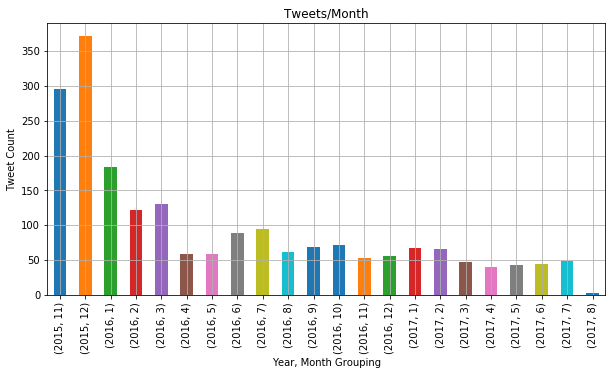

In [27]:
ax = dfproc.groupby(['created_at_year', 'created_at_month']).created_at.count().plot(kind='bar', figsize=(10, 5),
               title='Tweets/Month', grid=True)
ax.set_xlabel('Year, Month Grouping')
ax.set_ylabel('Tweet Count');

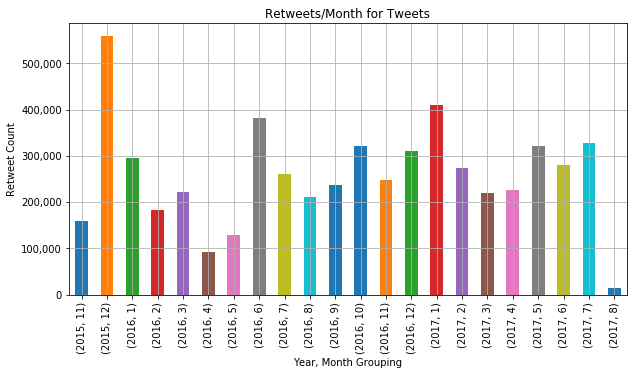

In [28]:
ax = dfproc.groupby(['created_at_year', 'created_at_month']).retweet_count.sum().plot(kind='bar', figsize=(10, 5),
               title='Retweets/Month for Tweets', grid=True)

ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel('Year, Month Grouping')
ax.set_ylabel('Retweet Count');

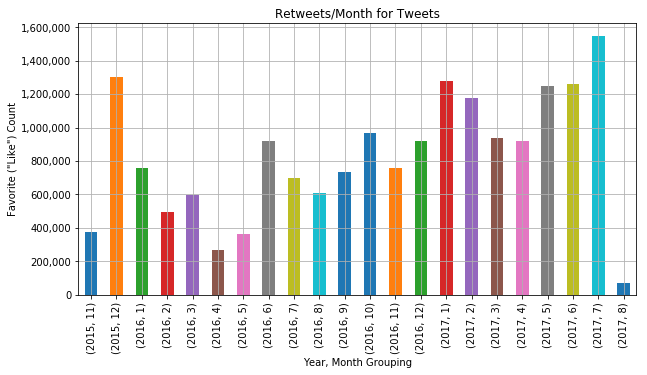

In [29]:
ax = dfproc.groupby(['created_at_year', 'created_at_month']).favorite_count.sum().plot(kind='bar', figsize=(10, 5),
               title='Retweets/Month for Tweets', grid=True)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel('Year, Month Grouping')
ax.set_ylabel('Favorite ("Like") Count');